<a href="https://colab.research.google.com/github/wodnjse/machine-learning/blob/main/K-Nearest-Neighbor/machine_learning_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# 농어의 길이만 있어도 무게를 잘 예측할 수 있다고 판단
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

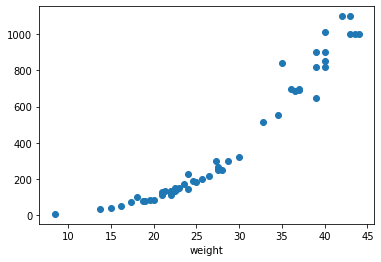

In [6]:
# 길이와 무게 산점도 그래프
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.xlabel('weight')
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)
print(train_input.shape, test_input.shape)

(42,) (14,)


In [8]:
# reshape() 함수 이해: 배열 크기 변경
test_array = np.array([1,2,3,4])
print(test_array.shape)
test_array = test_array.reshape(2, 2)
print(test_array.shape)

(4,)
(2, 2)


In [9]:
# 배열 크기 자동으로 지정 (앞의 -1 이해용)
train_input = train_input.reshape(-1, 1)
train_input.shape

(42, 1)

In [10]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [11]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
# k-최근접 이웃 회귀 모델을 훈련
knr.fit(train_input, train_target)
knr.score(test_input, test_target)

0.992809406101064

In [12]:
from sklearn.metrics import mean_absolute_error
# 테스트 세트에 대한 예측을 만듭니다
test_prediction = knr.predict(test_input)
# 테스트 세트에 대한 평균 절댓값 오차를 계산합니다. 
mae = mean_absolute_error(test_target, test_prediction)

In [13]:
# 모델이 너무 단순하여 훈련제드에 적절히 훈련되지 않음
# -> 더 복잡하게
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9698823289099254
0.992809406101064


In [14]:
# 이웃의 갯수를 3으로 설정합니다
knr.n_eighbors = 3
# 모델을 다시 훈련합니다
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9698823289099254
0.992809406101064


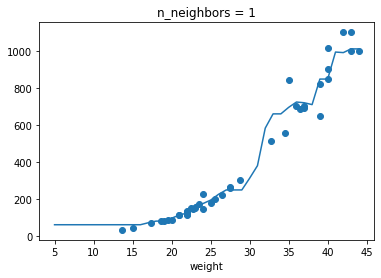

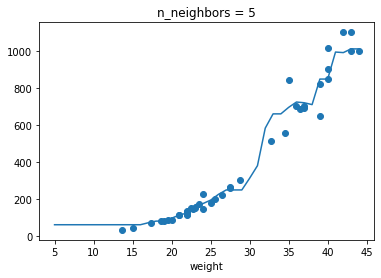

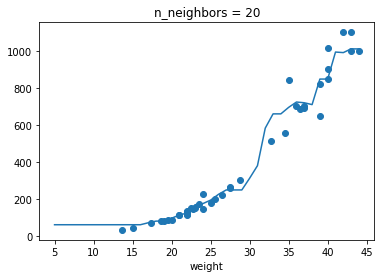

In [15]:
# k-최근접 이웃 회귀 객체를 만듭니다.
knr = KNeighborsRegressor()
x = np.arange(5, 45).reshape(-1,1)
# n = 1, 5, 10일 때 예측 결과를 그래프로 그립니다.
for n in [1, 5, 20]:
  # 모델 훈련
  knr.n_neighors = n
  knr.fit(train_input, train_target)
  # 지정한  범위 x에 대한 예측 구하기
  prediction = knr.predict(x)
  # 훈련 세트와 예측 결과 그래프 그리기
  plt.scatter(train_input, train_target)
  plt.plot(x, prediction)
  plt.title('n_neighbors = {}'.format(n))
  plt.xlabel('length')
  plt.xlabel('weight')
  plt.show()